In [4]:
from pylab import*
%matplotlib inline

In [14]:
def RK4(ec, p_ini, x, args=0, h=0.01):
    if (x[1]-x[0]) <= 5*h:
        h = (x[1]-x[0])/10
    tiempos=arange(x[0],x[1]+h,h)
    sol = zeros((len(tiempos),len(p_ini)))
    sol[0,:]=p_ini
    if args==0:
        for i in xrange(len(tiempos)-1):
            k_1=ec(sol[i,:],tiempos[i])
            k_2=ec(sol[i,:]+0.5*h*k_1,tiempos[i]+0.5*h)
            k_3=ec(sol[i,:]+0.5*h*k_2,tiempos[i]+0.5*h)
            k_4=ec(sol[i,:]+h*k_3,tiempos[i]+h)
            sol[i+1,:]= sol[i,:]+ (h/6.)*(k_1+2*k_2+2*k_3+k_4)
    else:
        for i in xrange(len(tiempos)-1):
            k_1=ec(sol[i,:],tiempos[i],args)
            k_2=ec(sol[i,:]+0.5*h*k_1,tiempos[i]+0.5*h,args)
            k_3=ec(sol[i,:]+0.5*h*k_2,tiempos[i]+0.5*h,args)
            k_4=ec(sol[i,:]+h*k_3,tiempos[i]+h,args)
            sol[i+1,:]= sol[i,:]+ (h/6.)*(k_1+2*k_2+2*k_3+k_4)
    return tiempos,sol

In [6]:
def e_mov(r_v,t,fric=0,g= 9.8,m=1):
    u =sqrt(r_v[2]**2+r_v[3]**2)
    dx = r_v[2]
    dy = r_v[3]
    if fric==0:
        dvx,dvy = 0,-(g/m)
        #print "No use un modelo de friccion"
    else:
        dvx = -fric([r_v[2],r_v[3]])[0]
        dvy = -(g/m) - fric([r_v[2],r_v[3]])[1]
        #print "Use un modelo de friccion"
    return array([dx,dy,dvx,dvy])

In [7]:
def fric_id(v):
    return array([0,0])

def fric_v(v,gamma=0.1):
    f_x = gamma*v[0]
    f_y = gamma*v[1]
    return array([f_x,f_y])

def fric_v2(v,gamma=0.1):
    norm_v = sqrt(v[0]**2 + v[1]**2)
    f_x = gamma*norm_v*v[0]
    f_y = gamma*norm_v*v[1]
    return array([f_x,f_y])

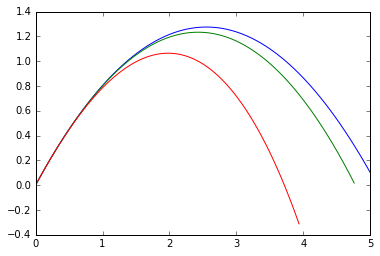

In [8]:
p=[0,0,5,5]
t,sol_id=RK4(e_mov,p,[0,1])
t,sol_fv=RK4(e_mov,p,[0,1],fric_v)
t,sol_fv2=RK4(e_mov,p,[0,1],fric_v2)
plot(sol_id[:,0],sol_id[:,1])
plot(sol_fv[:,0],sol_fv[:,1])
plot(sol_fv2[:,0],sol_fv2[:,1])

In [9]:
print e_mov([1,1,1,1],1)
print e_mov([1,1,1,1],1,fric_id)
print e_mov([1,1,1,1],1,fric_v)
print e_mov([1,1,1,1],1,fric_v2)


[ 1.   1.   0.  -9.8]
[ 1.   1.   0.  -9.8]
[ 1.   1.  -0.1 -9.9]
[ 1.          1.         -0.14142136 -9.94142136]


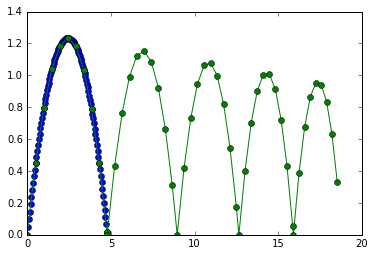

In [27]:
inicio=[0,0,5,5]
N = 50      #puntos de la trayectoria
trayectoria = zeros ((N,len(inicio)))
mi_dt=.1  #tiempo en el que quiero que guarde las cosas
trayectoria[0,:] = array(inicio)
for i in range(N-1):
    t,sol_dt=RK4(e_mov,trayectoria[i,:],[0,mi_dt],fric_v)
    if sol_dt[-1,:][1] < 0:
        #print "buscando punto de rebote"
        dt_busqueda = mi_dt/2
        y_izq = trayectoria[i,:]
        t,sol = RK4(e_mov,trayectoria[i,:],[0,dt_busqueda],fric_v)                                  
        y_med = sol[-1,:]
        while abs(y_izq[1]) > 1e-5:
            if y_izq[1]*y_med[1]<0:
                reinicio = y_izq
            else:
                reinicio = y_med
            dt_busqueda = dt_busqueda/2
            t, sol= RK4(e_mov,reinicio,[0,dt_busqueda],fric_v)
            y_izq = reinicio
            y_med = sol[-1,:]
        y_izq = array([y_izq[0],y_izq[1],y_izq[2],-y_izq[3]])
        trayectoria[i+1,:] = y_izq
    else:
        trayectoria[i+1,:] = sol_dt[-1,:]
    
plot(sol_fv[:,0],sol_fv[:,1],'o')
plot(trayectoria[:,0],trayectoria[:,1],'o-')
show()

In [22]:
print sol_fv2[80,:][1]
print sol_fv2[-1,:][1]

0.486963819865
-0.311193109272
